# Click Through Rate Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')
data.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [3]:
#checking basic data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [4]:
data.shape

(99999, 27)

In [5]:
data.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

In [6]:
data.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,1004.967550,0.289943,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,1.091916,0.505707,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.00000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


In [7]:
data.nunique()

click                   2
C1                      7
banner_pos              7
site_id              1485
site_domain          1331
site_category          19
app_id               1354
app_domain             96
app_category           21
device_id           16801
device_ip           78013
device_model         3145
device_type             4
device_conn_type        4
C14                  1722
C15                     8
C16                     9
C17                   399
C18                     4
C19                    64
C20                   154
C21                    60
month                   1
dayofweek               7
day                    10
hour                   24
y                       2
dtype: int64

In [8]:
# Converting banner_pos to categroical type
data['banner_pos']=data.banner_pos.astype('object')

In [9]:
data.dtypes

click                 bool
C1                   int64
banner_pos          object
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
month                int64
dayofweek            int64
day                  int64
hour                 int64
y                    int64
dtype: object

In [10]:
numerical = []
categorical = []

for col in (data.columns):
    if data[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

numerical columns =  ['click', 'C1', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour', 'y']

categorical columns =  ['banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


## Analysing data for outliers
<hr>

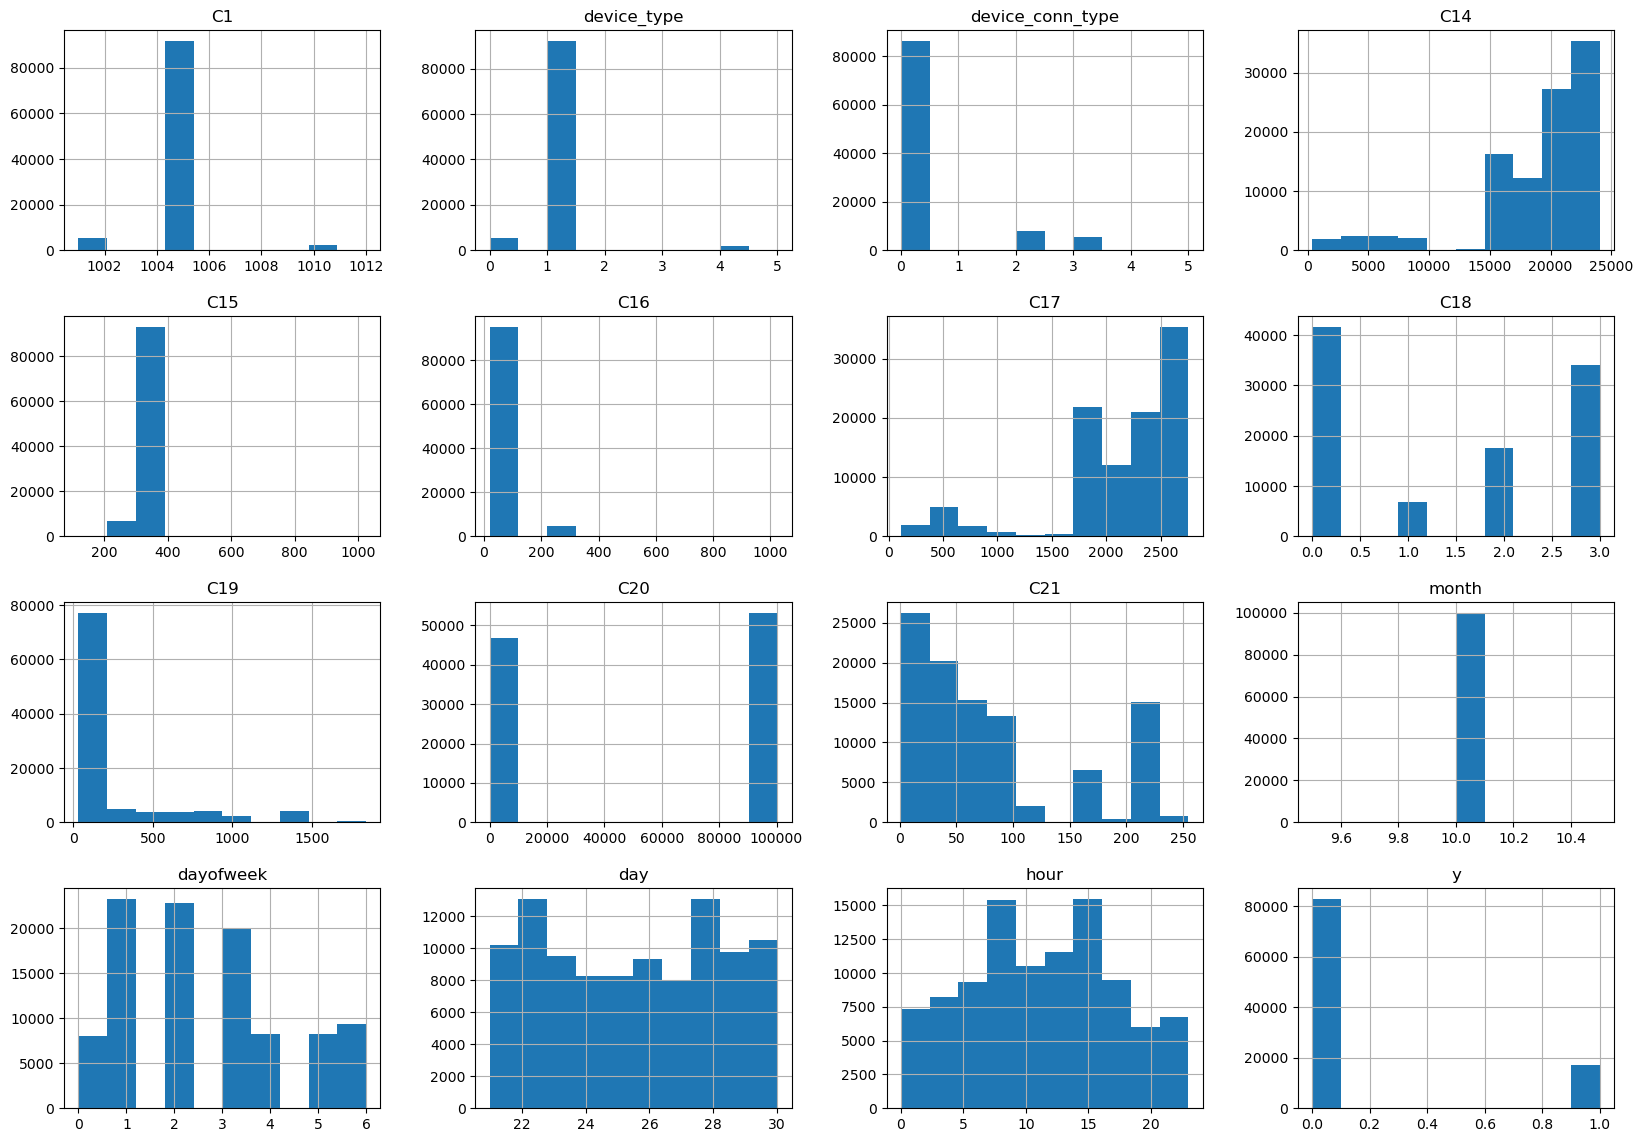

In [11]:
data[numerical].hist(figsize=(20,14))
plt.show()

# Building Models 
<hr>

Text(0.5, 1.05, 'Pearson correlation of Features')

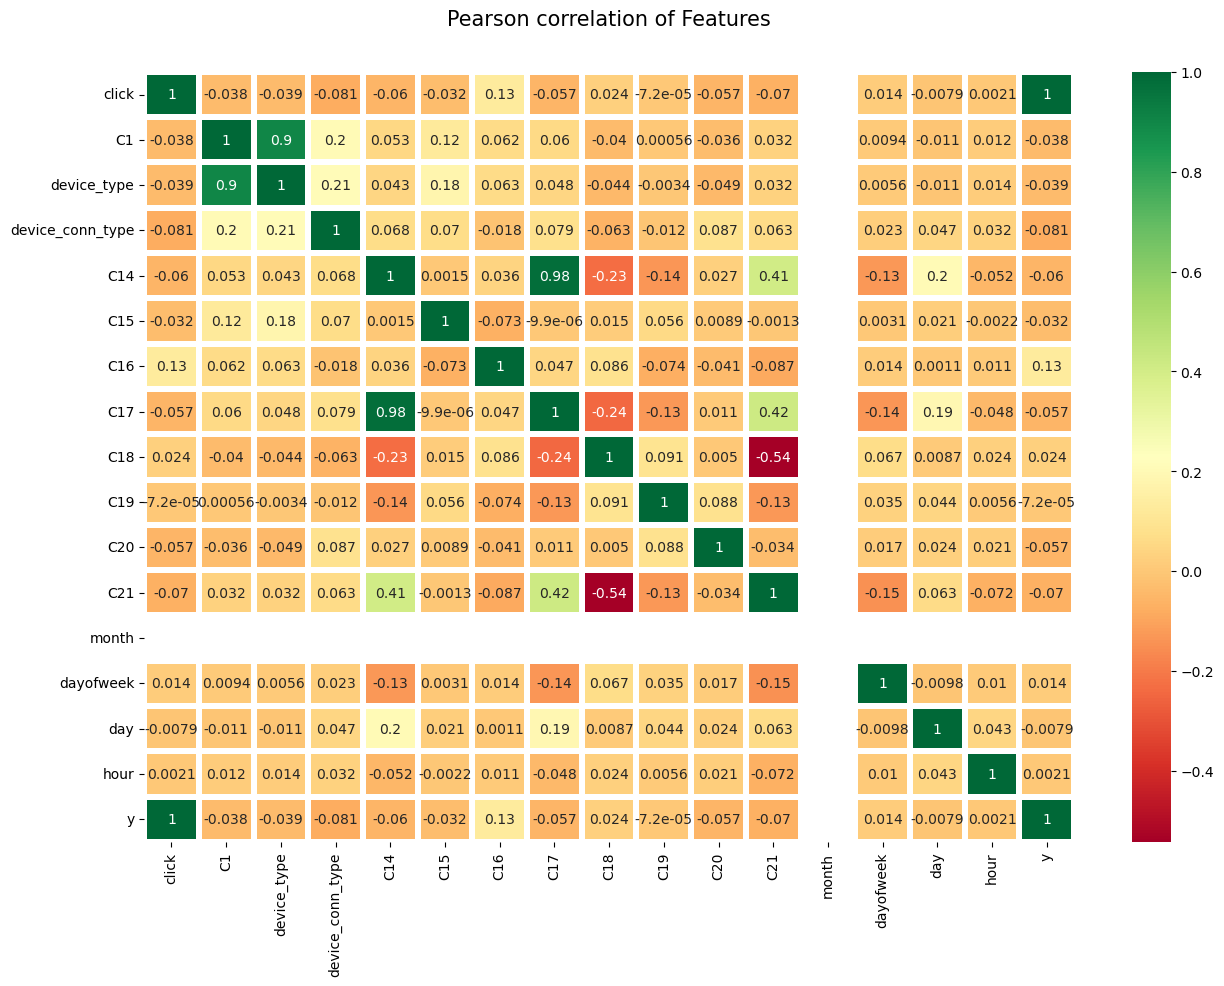

In [12]:
# Pearson correlation table to find the relationship with output with all input features. 

corr = data.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='RdYlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

## Observations From above

- y and click are same drop click column.
- C14 and C17 are highly co-related.
- Device type with C1 are highly co-related.
- Removing C20 anomalised column, since it have got nearly 47% of values with -1. As a categorical variable it's not expected to have values as -1.

In [13]:
# as said above dropping columns. 

data.drop(['month', 'C20'], axis=1, inplace=True)
data.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C21', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

In [14]:
data.drop(['click'], axis=1, inplace=True)
data.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
       'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C21', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

## Building basic models [no feature engineering]

- No feature engineering is done apart from removing definate columns click and month.
- We will run 3 models<br> 
a.Logistic Regression.<br>
b.Decision Tree Classifier.<br>
c.Random Forest Classifier.

In [15]:
import math
from sklearn import metrics

In [16]:
X = data.drop(['y'], axis=1)
y = data['y']

In [17]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
0,1005,0.180878,0.034043,0.034043,0.176707,0.197227,0.194074,0.198258,0.172586,0.147709,...,22683,320,50,2528,0,39,221,1,28,14
1,1005,0.180878,0.296498,0.258816,0.176707,0.197227,0.194074,0.198258,0.172586,0.194626,...,17037,320,50,1934,2,39,16,2,22,19


In [18]:
target_encoder = ce.TargetEncoder()
for col in (X.columns):
    if X[col].dtype == "object":
        X[col] = target_encoder.fit_transform(X[col], y)

### Functions for Storing and Cross Validation

In [19]:
#Splitting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [20]:
# This function helps in evaluation the given model and provide accuracy and confusion matrix. 

def model_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    #print(accuracy)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    #print(cnf_matrix)
    #metrics.plot_confusion_matrix(model, X_test, y_test)
    #plt.show()
    return accuracy, cnf_matrix

In [21]:
# Plots the ROC curve and returns false positive rate, true positive rate, and thresholds. 
from sklearn import metrics
def draw_roc(model, Xtest, actual):
    probs = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [22]:
# Returns the crossvalidation score for given number of n folds.
from sklearn.model_selection import cross_val_score

def cross_val (model, x, y, folds):
    crossvalidation = cross_val_score(model, x, y, cv= folds, n_jobs=-1)
    return crossvalidation

In [23]:
# For storing results in dataframe for evaluating the final result. 

def results(name, ytrain, xtrain, ytest, xtest, model, folds):
    
    crossvalidation = cross_val(model, xtrain, ytrain, folds)
    
    accuracy_test, cm1 =  model_eval(model, xtrain, ytrain)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_test = TP / (TP+FP)
    precision_test = TP / (TP+FN)
    
    accuracy_train, cm1 =  model_eval(model, xtest, ytest)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_train = TP / (TP+FP)
    precision_train = TP / (TP+FN)

    entry = {'Model': [name],
          'Accuracy_train': [accuracy_train],
          'recall_train': [recall_train],
          'precision_train': [precision_train],
          'Accuracy_test': [accuracy_train],
          'recall_test': [recall_train],
          'precision_test': [precision_train],
          'CrossVal_Mean': [crossvalidation.mean()],           
          'CrossVal1': [crossvalidation[0]],
          'CrossVal2': [crossvalidation[1]],
          'CrossVal3': [crossvalidation[2]],
          'CrossVal4': [crossvalidation[3]],
          'CrossVal5': [crossvalidation[4]],
          }
    result = pd.DataFrame(entry)
    return result

## Dummy Classifier
<hr>

In [24]:
from sklearn.dummy import DummyClassifier

outcome = pd.DataFrame()
dummy_clf = DummyClassifier(strategy= "most_frequent")
dummy_clf.fit(X_train, y_train)
accuracy, cnf_matrix  = model_eval(dummy_clf, X_train, y_train)
print(accuracy)
print(cnf_matrix)
temp = results("Dummy classifier", y_train, X_train, y_test, X_test, dummy_clf, 5)
outcome = outcome.append(temp)
outcome

0.8304547207817254
[[58131     0]
 [11868     0]]


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.8296,NaN,0.0,0.8296,NaN,0.0,0.830455,0.8305,0.830429,0.830429,0.830429,0.830488


- We have our score to cross validate 

In [25]:

X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
27322,1005,0.165301,0.202875,0.202875,0.205942,0.197227,0.194074,0.198258,0.172586,0.143573,...,15702,320,50,1722,0,35,79,0,27,19
31187,1005,0.180878,0.084112,0.258816,0.176707,0.197227,0.194074,0.198258,0.172586,0.139831,...,23626,320,50,2707,3,937,61,2,29,17
65409,1005,0.165301,0.202875,0.202875,0.205942,0.197227,0.194074,0.198258,0.172586,0.215827,...,22255,320,50,2545,0,167,221,1,28,11
14297,1005,0.165301,0.121093,0.125555,0.131223,0.191646,0.191579,0.106158,0.172586,0.277818,...,21591,320,50,2478,3,167,23,1,21,17
15664,1005,0.165301,0.018293,0.030255,0.176707,0.197227,0.194074,0.198258,0.172586,0.225136,...,23434,320,50,2683,1,163,212,1,28,19


## Logistic Regression - Model 1
<hr>

In [26]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
27322,0.363636,0.251280,0.273935,0.315709,0.338292,0.337196,0.355506,0.711083,0.139058,0.325741,...,0.647583,0.221239,0.02988,0.608696,0.000000,0.001107,0.307087,0.000000,0.666667,0.826087
31187,0.363636,0.327792,0.113463,0.402824,0.286169,0.337196,0.355506,0.711083,0.139058,0.316037,...,0.982381,0.221239,0.02988,0.981096,1.000000,0.500554,0.236220,0.333333,0.888889,0.739130
65409,0.363636,0.251280,0.273935,0.315709,0.338292,0.337196,0.355506,0.711083,0.139058,0.513070,...,0.924455,0.221239,0.02988,0.919849,0.000000,0.074197,0.866142,0.166667,0.777778,0.478261
14297,0.363636,0.251280,0.163431,0.195303,0.205078,0.327654,0.350288,0.303838,0.139058,0.673791,...,0.896400,0.221239,0.02988,0.894518,1.000000,0.074197,0.086614,0.166667,0.000000,0.739130
15664,0.363636,0.251280,0.024528,0.046896,0.286169,0.337196,0.355506,0.711083,0.139058,0.537207,...,0.974269,0.221239,0.02988,0.972023,0.333333,0.071982,0.830709,0.166667,0.777778,0.826087


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Scaling for test data set

X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
26002,0.363636,0.251280,0.163431,0.195303,0.205078,0.110747,0.085099,0.303838,0.101249,0.336464,...,0.903879,0.221239,0.029880,0.905104,0.0,0.001107,0.614173,0.333333,0.111111,0.521739
80420,0.363636,0.327792,0.400440,0.402824,0.286169,0.337196,0.355506,0.711083,0.139058,0.336464,...,0.844516,0.106195,0.015936,0.839698,0.0,0.003322,0.614173,0.333333,0.111111,0.608696


In [29]:
y_pred = model.predict(X_test)
accuracy, cnf_matrix = model_eval(model, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = results("Logistic Regression ", y_train, X_train, y_test, X_test, model, 5)
outcome = outcome.append(temp)

0.9516666666666667
[[24339   549]
 [  901  4211]]


In [30]:
outcome

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.829600,NaN,0.000000,0.829600,NaN,0.000000,0.830455,0.830500,0.830429,0.830429,0.830429,0.830488
0,Logistic Regression,0.951667,0.884664,0.823748,0.951667,0.884664,0.823748,0.952285,0.952571,0.951500,0.952143,0.951500,0.953711


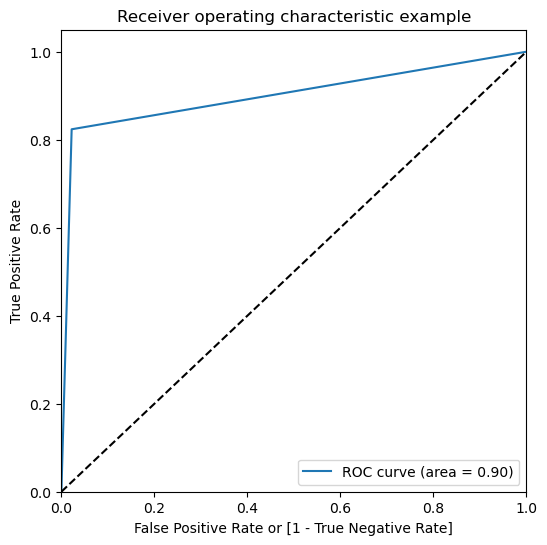

(array([0.        , 0.02205882, 1.        ]),
 array([0.        , 0.82374804, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [31]:
draw_roc(model, X_test, y_test)

# Decision Tree Classifier - Model 2
<hr>

In [32]:
#Splitting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [33]:
from sklearn.tree import DecisionTreeClassifier
pd.options.display.float_format = '{:.2f}'.format
X_train.head(1)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
27322,1005,0.17,0.20,0.20,0.21,0.20,0.19,0.20,0.17,0.14,...,15702,320,50,1722,0,35,79,0,27,19


In [34]:
#Fitting the model

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_preds = dtc.predict(X_test)
accuracy, cnf_matrix = model_eval(dtc, X_test, y_test)
print(accuracy)
print(cnf_matrix)

0.9462333333333334
[[24057   831]
 [  782  4330]]


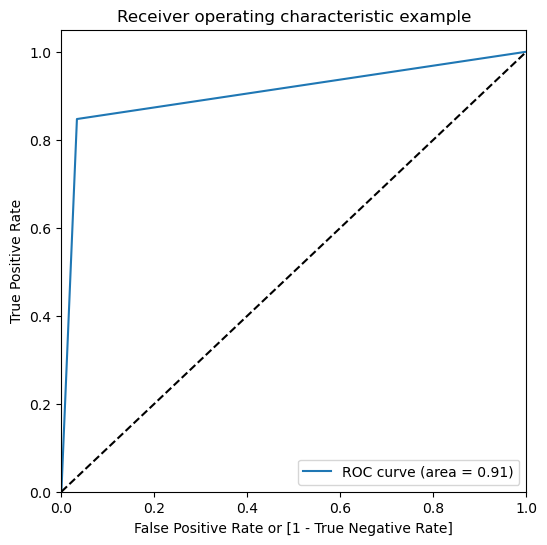

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,Logistic Regression,0.95,0.88,0.82,0.95,0.88,0.82,0.95,0.95,0.95,0.95,0.95,0.95
0,Decision Tree Classifier,0.95,0.84,0.85,0.95,0.84,0.85,0.95,0.95,0.95,0.95,0.94,0.95


In [35]:
# Checking the results

temp = results("Decision Tree Classifier", y_train, X_train, y_test, X_test, dtc, 5)
draw_roc(dtc, X_test, y_test)
outcome = outcome.append(temp)
outcome

## Random Forest Classifier - Model 3
<hr>

In [36]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_preds = model_rf.predict(X_test)
accuracy, cnf_matrix = model_eval(model_rf, X_test, y_test)
print(accuracy)
print(cnf_matrix)

0.9572666666666667
[[24487   401]
 [  881  4231]]


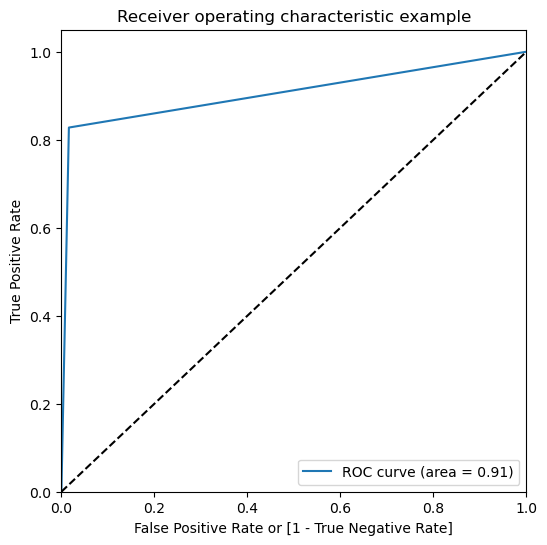

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,Logistic Regression,0.95,0.88,0.82,0.95,0.88,0.82,0.95,0.95,0.95,0.95,0.95,0.95
0,Decision Tree Classifier,0.95,0.84,0.85,0.95,0.84,0.85,0.95,0.95,0.95,0.95,0.94,0.95
0,Random Forest Classifier,0.96,0.91,0.83,0.96,0.91,0.83,0.96,0.96,0.96,0.96,0.96,0.96


In [37]:
temp = results("Random Forest Classifier", y_train, X_train, y_test, X_test, model_rf, 5)
draw_roc(model_rf, X_test, y_test)
outcome = outcome.append(temp)
outcome

## Observations

- We can see that Random Forest Classifier is performing the best among rest of them.
- ROC curve also looks good in Random Forest Classifier.


# Building Models using Feature Engineering 
<hr>

- Logistic Regression.
- Decision Tree Classifier.
- Random Forest Classifier.

### Logistic Regreesion using Feature Engineering - Model 1
<hr>

In [38]:
data_new = data.copy()

In [39]:
# C1 and device_type are highly corelated, since C1 is anomalised column we can drop it.
# C14 and C17 are highly co-related, dropping either is a good idea.

data_new.drop(['C14', 'C1'], axis=1, inplace= True)

In [40]:
X = data_new.drop(['y'], axis=1)
y = data_new['y']

In [41]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head(2)

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,...,device_conn_type,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
0,0.18,0.03,0.03,0.18,0.20,0.19,0.20,0.17,0.15,0.19,...,0,320,50,2528,0,39,221,1,28,14
1,0.18,0.30,0.26,0.18,0.20,0.19,0.20,0.17,0.19,0.28,...,0,320,50,1934,2,39,16,2,22,19


In [42]:
# Splitting the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [43]:
# Scaling

scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head(2)

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,...,device_conn_type,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
27322,0.25,0.27,0.32,0.34,0.34,0.36,0.71,0.14,0.33,0.18,...,0.00,0.22,0.03,0.61,0.00,0.00,0.31,0.00,0.67,0.83
31187,0.33,0.11,0.40,0.29,0.34,0.36,0.71,0.14,0.32,0.15,...,0.00,0.22,0.03,0.98,1.00,0.50,0.24,0.33,0.89,0.74


In [44]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69977
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8750.0
Date:                Sat, 30 Sep 2023   Deviance:                       17500.
Time:                        19:12:29   Pearson chi2:                 7.92e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4833
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -17.7450      0.413    -42.992      0.000     -18.554     -16.936
banner_pos           5.2054      0.576      9.042      0.000       4.077       6.334
site_id             -8.4131      0.446    -18.877      0.000      -9.287      -7.540
site_domain         10.7442      0.419     25.618      0.000       9.922      11.566
site_category        2.8728      0.350      8.198      0.000       2.186       3.560
app_id               4.9868      0.409     12.200      0.000       4.186       5.788
app_domain          -3.8373      0.435     -8.814      0.000      -4.691      -2.984
app_category        -1.0066      0.195     -5.155      0.000      -1.389      -0.624
device_id           23.1293      0.962     24.039      0.000      21.243      25.015
device_ip           20.3554      0.183    111.298      0.000      19.997      20.714
device_model         1.5168      0.226      6.717      0.000       1.074       1.959
device_type         -0.5219      0.370     -1.411      0.158      -1.247       0.203
device_conn_type     0.3514      0.184      1.910      0.056      -0.009       0.712
C15                  0.6847      1.313      0.521      0.602      -1.889       3.258
C16                 -2.1462      0.522     -4.109      0.000      -3.170      -1.123
C17                  0.0694      0.116      0.597      0.550      -0.158       0.297
C18                  0.0052      0.063      0.083      0.934      -0.118       0.128
C19                  0.5784      0.107      5.385      0.000       0.368       0.789
C21                 -0.1440      0.102     -1.406      0.160      -0.345       0.057
dayofweek            0.1688      0.072      2.352      0.019       0.028       0.309
day                 -0.0562      0.066     -0.853      0.393      -0.185       0.073
hour                -0.2897      0.080     -3.617      0.000      -0.447      -0.133
====================================================================================
"""

In [45]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[56940  1191]
 [ 2081  9787]]
0.9532564750925013


In [46]:
def sm_model_evaluation (model, x_test, y_test):
    '''
    model = sm model
    y_test = series of labels 
    columns = list of columns in features
    x_test = test dataframe 
    '''
    X_sm = sm.add_constant(x_test)
    y_pred = res.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'y':y_test, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
    confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print(confusion)

In [47]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
sm_model_evaluation(res, X_test, y_test)  


0.9523
[[24338   550]
 [  881  4231]]


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,189.43
2,site_id,8.95
3,site_domain,8.73
5,app_id,3.22
6,app_domain,3.00
7,app_category,2.53
4,site_category,1.74
18,C21,1.71
16,C18,1.55
10,device_model,1.53


In [49]:
# VIF looks good, w.r.t P values hour and day have got highest, will remove and build the model.

X_train_sm.drop(['hour','day'], axis=1, inplace= True)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69979
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8757.1
Date:                Sat, 30 Sep 2023   Deviance:                       17514.
Time:                        19:12:37   Pearson chi2:                 7.98e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4832
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -17.9058      0.412    -43.481      0.000     -18.713     -17.099
banner_pos           5.2293      0.574      9.103      0.000       4.103       6.355
site_id             -8.4116      0.444    -18.927      0.000      -9.283      -7.541
site_domain         10.7228      0.418     25.634      0.000       9.903      11.543
site_category        2.8801      0.351      8.213      0.000       2.193       3.567
app_id               4.9512      0.408     12.136      0.000       4.152       5.751
app_domain          -3.7519      0.434     -8.643      0.000      -4.603      -2.901
app_category        -1.0269      0.195     -5.266      0.000      -1.409      -0.645
device_id           23.1501      0.963     24.044      0.000      21.263      25.037
device_ip           20.3382      0.183    111.363      0.000      19.980      20.696
device_model         1.5281      0.226      6.775      0.000       1.086       1.970
device_type         -0.5606      0.369     -1.518      0.129      -1.285       0.163
device_conn_type     0.3510      0.184      1.909      0.056      -0.009       0.711
C15                  0.6615      1.320      0.501      0.616      -1.926       3.249
C16                 -2.1295      0.522     -4.081      0.000      -3.152      -1.107
C17                  0.0588      0.114      0.515      0.607      -0.165       0.283
C18                  0.0015      0.063      0.024      0.981      -0.121       0.124
C19                  0.5757      0.107      5.368      0.000       0.365       0.786
C21                 -0.1237      0.102     -1.212      0.226      -0.324       0.076
dayofweek            0.1724      0.072      2.405      0.016       0.032       0.313
====================================================================================
"""

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,184.00
2,site_id,8.94
3,site_domain,8.73
5,app_id,3.21
6,app_domain,2.98
7,app_category,2.53
4,site_category,1.74
18,C21,1.71
16,C18,1.55
10,device_model,1.53


In [51]:
X_train_sm.drop(['dayofweek','device_ip', 'C15'], axis=1, inplace= True)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69982
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24365.
Date:                Sat, 30 Sep 2023   Deviance:                       48730.
Time:                        19:12:44   Pearson chi2:                 6.49e+14
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1928
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.2244      0.180    -56.850      0.000     -10.577      -9.872
banner_pos           1.2041      0.355      3.394      0.001       0.509       1.899
site_id              1.3810      0.286      4.825      0.000       0.820       1.942
site_domain          3.2311      0.268     12.060      0.000       2.706       3.756
site_category        0.7535      0.194      3.887      0.000       0.374       1.133
app_id               6.7720      0.216     31.297      0.000       6.348       7.196
app_domain          -2.2357      0.234     -9.552      0.000      -2.694      -1.777
app_category        -1.1216      0.105    -10.644      0.000      -1.328      -0.915
device_id           37.2863      0.918     40.632      0.000      35.488      39.085
device_model         3.1224      0.125     24.982      0.000       2.877       3.367
device_type          1.1912      0.221      5.382      0.000       0.757       1.625
device_conn_type     0.2019      0.107      1.891      0.059      -0.007       0.411
C16                 -2.7225      0.308     -8.849      0.000      -3.326      -2.120
C17                 -0.1009      0.059     -1.720      0.086      -0.216       0.014
C18                 -0.1749      0.035     -5.006      0.000      -0.243      -0.106
C19                  0.0669      0.062      1.085      0.278      -0.054       0.188
C21                 -0.2045      0.057     -3.589      0.000      -0.316      -0.093
====================================================================================
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,95.13
2,site_id,8.90
3,site_domain,8.71
5,app_id,3.15
6,app_domain,2.97
7,app_category,2.51
4,site_category,1.74
16,C21,1.69
14,C18,1.54
9,device_model,1.50


#### Model P values and VIF looks good, will find the best threshold for classification.

In [53]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[57475   656]
 [ 9232  2636]]
0.8587408391548451


In [54]:
col = list(X_train_sm.columns)
col.remove('const')
sm_model_evaluation(res, X_test[col], y_test)  

0.8573
[[24565   323]
 [ 3958  1154]]


In [55]:
numbers = [float(x)/20 for x in range(20)]
print(numbers)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
27322,0,0.14,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31187,0,0.12,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65409,0,0.19,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14297,1,0.15,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15664,0,0.08,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
cutoff_df = pd.DataFrame( columns = ['Thresold_prob','accuracy','recall','precision'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    accuracy = (TP + TN)/total1
    
    recall = TP / (TP+FP)
    precision = TP / (TP+FN)
    cutoff_df.loc[i] =[ i ,accuracy,recall,precision]
cutoff_df

,Thresold_prob,accuracy,recall,precision
0.00,0.00,0.17,0.17,1.00
0.05,0.05,0.43,0.23,0.98
0.10,0.10,0.59,0.28,0.91
0.15,0.15,0.68,0.32,0.81
0.20,0.20,0.76,0.38,0.66
0.25,0.25,0.81,0.45,0.53
0.30,0.30,0.84,0.54,0.41
0.35,0.35,0.85,0.60,0.34
0.40,0.40,0.86,0.68,0.29
0.45,0.45,0.86,0.73,0.25


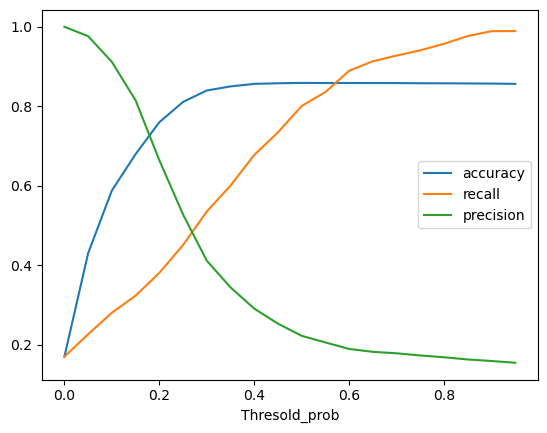

In [57]:
cutoff_df.plot.line(x='Thresold_prob', y=['accuracy','recall','precision'])
plt.show()

In [58]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.50 else 0)
y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
27322,0,0.14,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31187,0,0.12,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65409,0,0.19,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14297,1,0.15,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15664,0,0.08,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X_train_sm.drop('const', axis= 1, inplace= True)
X_test = X_test[X_train_sm.columns]
print(X_train_sm.shape)
print(X_test.shape)

(69999, 16)
(30000, 16)


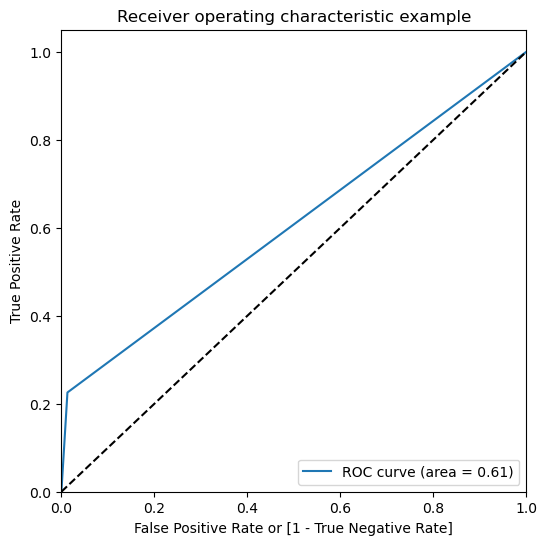

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,Logistic Regression,0.95,0.88,0.82,0.95,0.88,0.82,0.95,0.95,0.95,0.95,0.95,0.95
0,Decision Tree Classifier,0.95,0.84,0.85,0.95,0.84,0.85,0.95,0.95,0.95,0.95,0.94,0.95
0,Random Forest Classifier,0.96,0.91,0.83,0.96,0.91,0.83,0.96,0.96,0.96,0.96,0.96,0.96
0,Logistic Regression Feature Enginnering,0.86,0.78,0.23,0.86,0.78,0.23,0.86,0.86,0.86,0.86,0.86,0.86


In [60]:
model = LogisticRegression()
model.fit(X_train_sm, y_train)
accuracy, cnf_matrix = model_eval(model, X_test[X_train_sm.columns], y_test)
temp = results("Logistic Regression Feature Enginnering", y_train, X_train_sm, y_test, X_test[X_train_sm.columns], \
                     model, 5)
draw_roc(model, X_test[X_train_sm.columns], y_test)
outcome = outcome.append(temp)
outcome

## Decision Tree Model with Feature Egineering - Model 2
<hr>

In [61]:
# Splitting the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [62]:
dtc_feature = DecisionTreeClassifier(random_state=42)
dtc_feature.fit(X_train, y_train)
feature_importances = dtc_feature.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
8,device_ip,0.81
9,device_model,0.04
20,hour,0.04
7,device_id,0.02
1,site_id,0.01
19,day,0.01
14,C17,0.01
18,dayofweek,0.01
16,C19,0.01
17,C21,0.01


In [63]:
df = df[df.importance > 0.02]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)

In [64]:
# Fitting the model

dtc_feature = DecisionTreeClassifier(random_state=42)
dtc_feature.fit(X_train[rf_cols], y_train)

DecisionTreeClassifier(random_state=42)

['device_id', 'device_ip', 'device_model', 'hour']
4
Train results
accuracy 0.9921998885698368
cnf_matrix 
 [[58057    74]
 [  472 11396]]
Test results
accuracy 0.9461333333333334
cnf_matrix 
 [[24138   750]
 [  866  4246]]


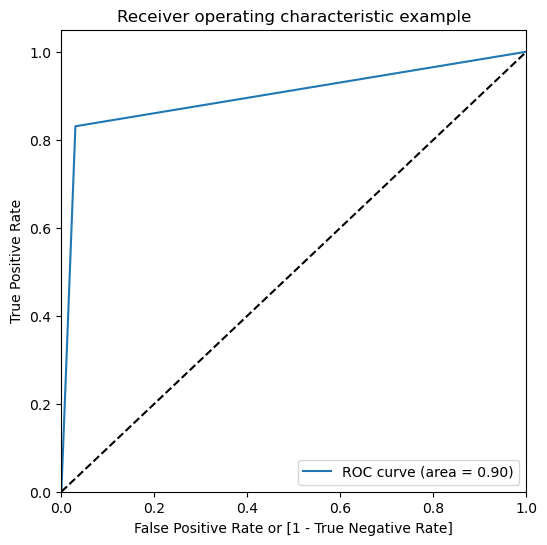

(array([0.      , 0.030135, 1.      ]),
 array([0.        , 0.83059468, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [65]:
print(rf_cols)
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]
print(len(rf_cols))
predict_rf = dtc_feature.predict(X_train)
predict_rf_test = dtc_feature.predict(X_test)

accuracy, cnf_matrix = model_eval(dtc_feature, X_train, y_train)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

accuracy, cnf_matrix = model_eval(dtc_feature, X_test, y_test)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

draw_roc(dtc_feature, X_test, y_test)

## Observation 
<hr>

- Above basic tree with right features seems data is overfitting. having the correct hyper parameter tuning help in interpretation and bit of over fitting of the model.

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1,15),
    'min_samples_leaf': range(10,200,20),
    'min_samples_split': range(50, 150, 50)
    
}
n_folds = 5
dtree = DecisionTreeClassifier(random_state= 42)
tree3 = GridSearchCV(dtree, param_grid, cv=n_folds, n_jobs =-1,return_train_score=True)
tree3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'min_samples_leaf': range(10, 200, 20),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True)

In [67]:
tree3.best_params_

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 50}

In [68]:
tree3.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)

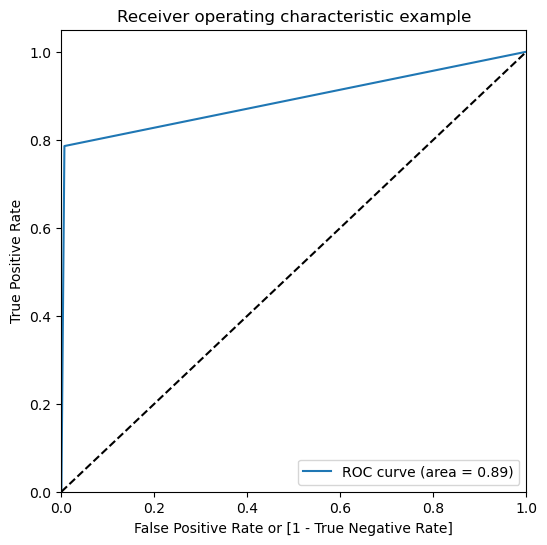

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,Logistic Regression,0.95,0.88,0.82,0.95,0.88,0.82,0.95,0.95,0.95,0.95,0.95,0.95
0,Decision Tree Classifier,0.95,0.84,0.85,0.95,0.84,0.85,0.95,0.95,0.95,0.95,0.94,0.95
0,Random Forest Classifier,0.96,0.91,0.83,0.96,0.91,0.83,0.96,0.96,0.96,0.96,0.96,0.96
0,Logistic Regression Feature Enginnering,0.86,0.78,0.23,0.86,0.78,0.23,0.86,0.86,0.86,0.86,0.86,0.86
0,Decision tree with feature engine,0.96,0.96,0.79,0.96,0.96,0.79,0.96,0.96,0.96,0.96,0.96,0.96


In [69]:
dt_tree =  DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)
dt_tree.fit(X_train, y_train)
accuracy, cnf_matrix = model_eval(dt_tree, X_test, y_test)
temp = results("Decision tree with feature engine", y_train, X_train, y_test, X_test, \
                     dt_tree, 5)
draw_roc(dt_tree, X_test, y_test)
outcome = outcome.append(temp)
outcome

## Random Forest Model with Feature Engineering - Model 3

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
X_train.head(2)

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,...,device_conn_type,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
27322,0.17,0.20,0.20,0.21,0.20,0.19,0.20,0.17,0.14,0.12,...,0,320,50,1722,0,35,79,0,27,19
31187,0.18,0.08,0.26,0.18,0.20,0.19,0.20,0.17,0.14,0.10,...,0,320,50,2707,3,937,61,2,29,17


In [71]:
rfc_feature = RandomForestClassifier(random_state=42)
rfc_feature.fit(X_train, y_train)
feature_importances = rfc_feature.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
8,device_ip,0.70
7,device_id,0.07
9,device_model,0.05
20,hour,0.04
1,site_id,0.02
2,site_domain,0.02
19,day,0.01
18,dayofweek,0.01
4,app_id,0.01
14,C17,0.01


['site_id', 'site_domain', 'device_id', 'device_ip', 'device_model', 'hour']
6
Train results
accuracy 0.9960999442849183
cnf_matrix 
 [[58040    91]
 [  182 11686]]
Test results
accuracy 0.9547666666666667
cnf_matrix 
 [[24366   522]
 [  835  4277]]


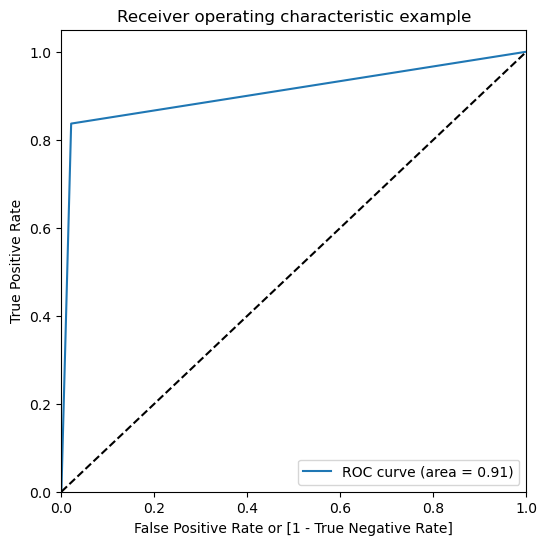

(array([0.        , 0.02097396, 1.        ]),
 array([0.        , 0.83665884, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [72]:
df = df[df.importance > 0.02]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)
        
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]

rfc_feature = RandomForestClassifier(random_state=42)
rfc_feature.fit(X_train, y_train)
print(rf_cols)

print(len(rf_cols))
predict_rf = rfc_feature.predict(X_train)
predict_rf_test = rfc_feature.predict(X_test)

accuracy, cnf_matrix = model_eval(rfc_feature, X_train, y_train)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

accuracy, cnf_matrix = model_eval(rfc_feature, X_test, y_test)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

draw_roc(rfc_feature, X_test, y_test)

In [73]:
temp = results("Random Forest with feature engine", y_train, X_train, y_test, X_test, \
                     rfc_feature, 5)
outcome = outcome.append(temp)

In [74]:
outcome.reset_index(drop=True, inplace=True)
outcome

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
1,Logistic Regression,0.95,0.88,0.82,0.95,0.88,0.82,0.95,0.95,0.95,0.95,0.95,0.95
2,Decision Tree Classifier,0.95,0.84,0.85,0.95,0.84,0.85,0.95,0.95,0.95,0.95,0.94,0.95
3,Random Forest Classifier,0.96,0.91,0.83,0.96,0.91,0.83,0.96,0.96,0.96,0.96,0.96,0.96
4,Logistic Regression Feature Enginnering,0.86,0.78,0.23,0.86,0.78,0.23,0.86,0.86,0.86,0.86,0.86,0.86
5,Decision tree with feature engine,0.96,0.96,0.79,0.96,0.96,0.79,0.96,0.96,0.96,0.96,0.96,0.96
6,Random Forest with feature engine,0.95,0.89,0.84,0.95,0.89,0.84,0.96,0.96,0.96,0.96,0.95,0.95


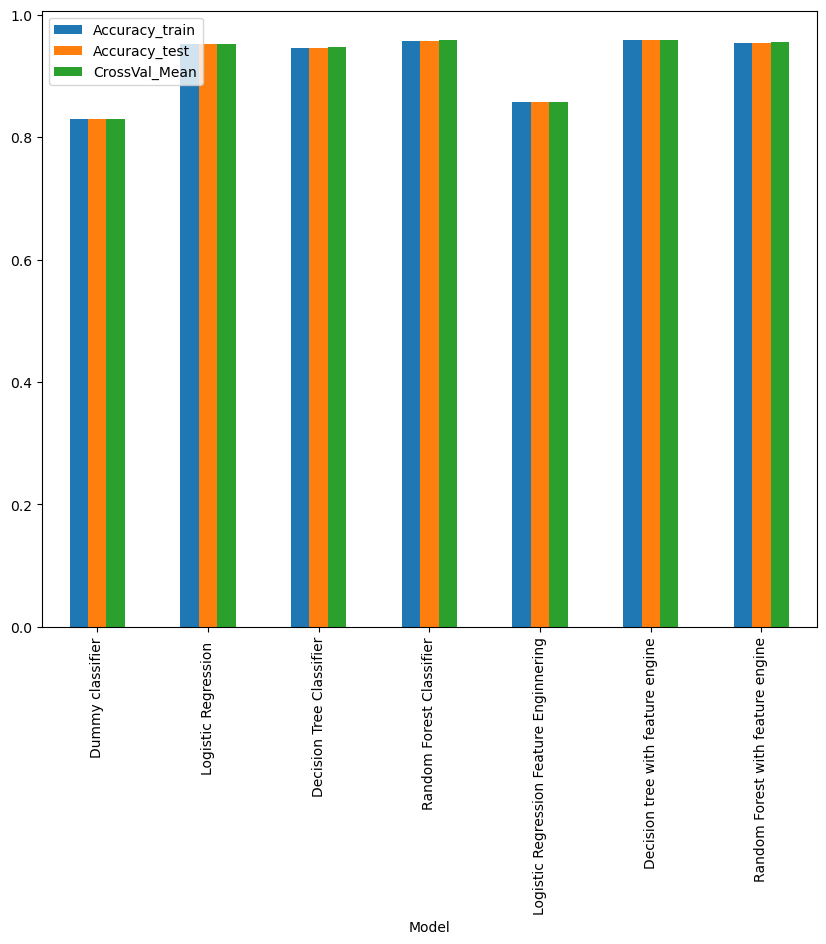

In [75]:
plt.rcParams["figure.figsize"] = (10,8)
outcome.plot(x='Model', y=['Accuracy_train','Accuracy_test','CrossVal_Mean'], kind="bar")
plt.xticks(rotation=90)
plt.show()

# Conclusion
<hr>

- If we have to select one model, Random forest classifier with feature enginnering looks promising and best. although after the feature engineering the training and test results looks same as before feature engineering, but model is very robust with new features and rightly fitted for both training and test dataset. Decisiontree and logistic regression classifer seems to have low accuracy, precision, and recall, overall random forest classifier seems doing better with all aspects.